In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.spatial.transform import Rotation as R

In [6]:
table = pd.read_csv('./ID445/angle_distribution.csv', encoding='utf-8')

In [8]:
flux = pd.read_excel('./ID445/flux.xlsx', sheet_name=0)

In [13]:
flux

,Nozzle No.,Particle Flux(#/s)
0,1,3008480000000000
1,2,3695730000000000
2,3,3408640000000000
3,4,2185020000000000
4,5,1364780000000000
5,6,3008950000000000
6,7,2911250000000000
7,8,1343860000000000
8,9,2936420000000000
9,10,2816440000000000


In [7]:
table

,theta,Nozzle1_Freq,Nozzle2_Freq,Nozzle3_Freq,Nozzle4_Freq,Nozzle5_Freq,Nozzle6_Freq,Nozzle7_Freq,Nozzle8_Freq,Nozzle9_Freq,Nozzle10_Freq,Nozzle11_Freq,Nozzle12_Freq,Nozzle13_Freq
0,1.5,0.119320,0.099044,0.098064,0.111139,0.121596,0.098141,0.102616,0.122508,0.100862,0.103945,0.120928,0.099968,0.104359
1,4.5,0.341089,0.285921,0.283619,0.318092,0.343250,0.284262,0.292170,0.345520,0.289879,0.300857,0.350688,0.289757,0.298054
2,7.5,0.528410,0.454685,0.451332,0.504098,0.534509,0.450043,0.464110,0.534193,0.463509,0.470707,0.543672,0.459212,0.472777
3,10.5,0.688818,0.603924,0.601291,0.655494,0.697887,0.599263,0.613519,0.694446,0.605814,0.625967,0.692704,0.602767,0.622832
4,13.5,0.810679,0.728149,0.724350,0.781962,0.814637,0.721339,0.738465,0.812309,0.730423,0.744323,0.825956,0.733236,0.743568
5,16.5,0.898699,0.827311,0.825215,0.879452,0.910043,0.825309,0.838494,0.902904,0.834420,0.838824,0.913431,0.831636,0.845886
6,19.5,0.958575,0.904339,0.898955,0.942201,0.961182,0.903670,0.913054,0.958694,0.909648,0.911575,0.973335,0.907463,0.909840
7,22.5,0.989736,0.950239,0.957890,0.982206,0.989413,0.959501,0.965649,0.990078,0.957161,0.965748,1.000000,0.963704,0.966668
8,25.5,1.000000,0.987806,0.983948,1.000000,1.000000,0.992839,0.994205,1.000000,0.991189,0.991911,0.998549,0.992168,0.992567
9,28.5,0.988888,1.000000,1.000000,0.993223,0.975094,1.000000,1.000000,0.977593,1.000000,1.000000,0.986913,1.000000,1.000000


In [24]:
table_numpy = table.to_numpy()

In [14]:
flux_numpy = flux.to_numpy()

In [19]:
flux_numpy[:,1]

array([3008480000000000, 3695730000000000, 3408640000000000,
       2185020000000000, 1364780000000000, 3008950000000000,
       2911250000000000, 1343860000000000, 2936420000000000,
       2816440000000000, 1339050000000000, 2934360000000000,
       2813620000000000], dtype=int64)

In [21]:
flux_numpy[:,1]/np.sum(flux_numpy[:, 1])

array([0.08909633, 0.10944928, 0.10094709, 0.06470951, 0.04041805,
       0.08911025, 0.08621685, 0.0397985 , 0.08696226, 0.08340905,
       0.03965605, 0.08690126, 0.08332553])

In [22]:
np.sum(flux_numpy[:,1]/np.sum(flux_numpy[:, 1]))

0.9999999999999999

In [23]:
table_numpy.shape

(30, 14)

In [91]:
table_numpy_extend = np.zeros((32, 14))
table_numpy_extend[1:-1,:] = table_numpy
table_numpy_extend[-1,0] = 90

In [92]:
table_numpy_extend[:, 0]

array([ 0. ,  1.5,  4.5,  7.5, 10.5, 13.5, 16.5, 19.5, 22.5, 25.5, 28.5,
       31.5, 34.5, 37.5, 40.5, 43.5, 46.5, 49.5, 52.5, 55.5, 58.5, 61.5,
       64.5, 67.5, 70.5, 73.5, 76.5, 79.5, 82.5, 85.5, 88.5, 90. ])

In [93]:
table_numpy[0, 1:]

array([0.11932048, 0.09904428, 0.09806386, 0.11113881, 0.12159569,
       0.09814107, 0.1026157 , 0.12250822, 0.10086248, 0.10394527,
       0.12092807, 0.0999678 , 0.10435948])

In [32]:
np.sum(table_numpy[:, 1:], axis=0)

array([18.18567407, 17.68764794, 17.69989885, 17.95412005, 18.09894403,
       17.60343284, 17.73594309, 18.18499487, 17.72448815, 17.77305476,
       18.28382038, 17.67978114, 17.7749002 ])

In [42]:
table_numpy[:, 1]

array([0.11932048, 0.34108927, 0.52840986, 0.68881782, 0.81067865,
       0.89869889, 0.958575  , 0.98973627, 1.        , 0.98888823,
       0.97359526, 0.94160659, 0.92149254, 0.89044669, 0.85363053,
       0.80849357, 0.76275364, 0.71297496, 0.65380415, 0.60051906,
       0.54146163, 0.48002085, 0.42180478, 0.36083933, 0.29814291,
       0.238941  , 0.18022837, 0.12522189, 0.0724964 , 0.02298542])

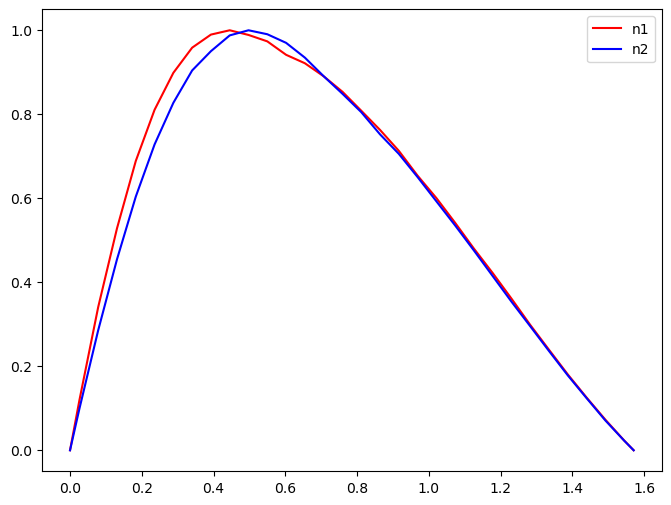

In [94]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(table_numpy_extend[:, 0]*np.pi/180, table_numpy_extend[:, 1],'red', label = 'n1')
ax.plot(table_numpy_extend[:, 0]*np.pi/180, table_numpy_extend[:, 2], 'blue', label = 'n2')

ax.legend()
plt.show()

In [81]:
xnew = np.arange(0.2, np.pi-0.1, 0.001)

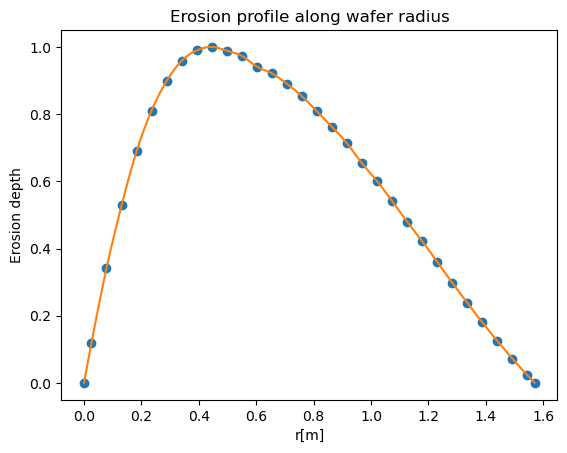

In [96]:
erosion_func = interpolate.interp1d(table_numpy_extend[:, 0]*np.pi/180, table_numpy_extend[:, 1], kind='quadratic')
# erosion_func = interpolate.interp1d(table_numpy_extend[:, 1], table_numpy_extend[:, 0]*np.pi/180, kind='quadratic')
xnew = np.arange(0, np.pi/2, 0.001)
ynew = erosion_func(xnew)   # use interpolation function returned by `interp1d`
plt.plot(table_numpy_extend[:, 0]*np.pi/180, table_numpy_extend[:, 1],'o', xnew, ynew, '-')
plt.title('Erosion profile along wafer radius')
plt.xlabel('r[m]')
plt.ylabel('Erosion depth')
plt.show()

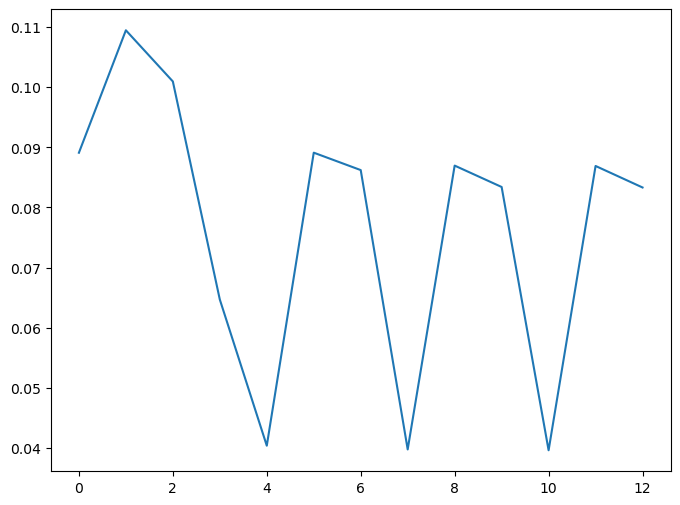

In [44]:
fig, ax = plt.subplots(figsize=(8,6))
flux_array = flux_numpy[:,1]/np.sum(flux_numpy[:, 1])

ax.plot(np.arange(flux_array.shape[0]), flux_array)

plt.show()

In [56]:
np.sum(table_numpy, axis=0)

array([1350.        ,   18.18567407,   17.68764794,   17.69989885,
         17.95412005,   18.09894403,   17.60343284,   17.73594309,
         18.18499487,   17.72448815,   17.77305476,   18.28382038,
         17.67978114,   17.7749002 ])

In [59]:
table_numpy[:, 0]

array([ 1.5,  4.5,  7.5, 10.5, 13.5, 16.5, 19.5, 22.5, 25.5, 28.5, 31.5,
       34.5, 37.5, 40.5, 43.5, 46.5, 49.5, 52.5, 55.5, 58.5, 61.5, 64.5,
       67.5, 70.5, 73.5, 76.5, 79.5, 82.5, 85.5, 88.5])

In [60]:
table_numpy[:, 0] - 1.5

array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30., 33., 36.,
       39., 42., 45., 48., 51., 54., 57., 60., 63., 66., 69., 72., 75.,
       78., 81., 84., 87.])

In [192]:
rotate_angle = np.array([25, 20, -10, -15, -10, -10, -10, 0, 0, 0, 0, 0, 0])

In [193]:
rotate_angle.shape

(13,)

In [212]:
nozzle_1 = np.array([277-43-2, 49.5, 120-6])
nozzle_2 = np.array([277-80-2, 49.5, 120-6])
nozzle_3 = np.array([277-134-2, 49.5, 120-6])
nozzle_4 = np.array([277-158-2, 49.5, 120-6])

nozzle_5 = np.array([277-184-2, 49.5, 120-6])
nozzle_8 = np.array([277-184-2, 49.5-17, 120-6])
nozzle_11 = np.array([277-184-2, 49.5+17, 120-6])

nozzle_6 = np.array([277-207-2, 49.5, 120-6])
nozzle_9 = np.array([277-207-2, 49.5-17, 120-6])
nozzle_12 = np.array([277-207-2, 49.5+17, 120-6])

nozzle_7 = np.array([277-228-2, 49.5, 120-6])
nozzle_10 = np.array([277-228-2, 49.5-17, 120-6])
nozzle_13 = np.array([277-228-2, 49.5+17, 120-6])

In [213]:
nozzles = np.array([nozzle_1, nozzle_2, nozzle_3, nozzle_4, nozzle_5, nozzle_6, nozzle_7, nozzle_8, \
                    nozzle_9, nozzle_10, nozzle_11, nozzle_12, nozzle_13])

In [214]:
print(nozzles)

[[232.   49.5 114. ]
 [195.   49.5 114. ]
 [141.   49.5 114. ]
 [117.   49.5 114. ]
 [ 91.   49.5 114. ]
 [ 68.   49.5 114. ]
 [ 47.   49.5 114. ]
 [ 91.   32.5 114. ]
 [ 68.   32.5 114. ]
 [ 47.   32.5 114. ]
 [ 91.   66.5 114. ]
 [ 68.   66.5 114. ]
 [ 47.   66.5 114. ]]


In [215]:
print(nozzles[0])

[232.   49.5 114. ]


In [216]:
nozzles.shape

(13, 3)

In [217]:
N = int(1e7)

flux_array = flux_numpy[:,1]/np.sum(flux_numpy[:, 1])

print(flux_array)

[0.08909633 0.10944928 0.10094709 0.06470951 0.04041805 0.08911025
 0.08621685 0.0397985  0.08696226 0.08340905 0.03965605 0.08690126
 0.08332553]


In [218]:
print(flux_array.shape)

(13,)


In [219]:
1614372008

1614372008

In [220]:
table_numpy_ratio = table_numpy/np.sum(table_numpy, axis=0)

np.sum(table_numpy_ratio[:, 2])

1.0

In [221]:
N = int(1e7)

flux_array = flux_numpy[:,1]/np.sum(flux_numpy[:, 1])

table_numpy_ratio = table_numpy/np.sum(table_numpy, axis=0)

# print(table_numpy_ratio)
# samples_vel = np.zeros(1)
# samples_pos = np.zeros((1, 3))

vel_pos = np.zeros((1, 6))
for j in range(nozzles.shape[0]):
    print(j)
    samples_vel = np.zeros(1)
    # samples_pos = np.zeros((1, 3))
    for i in range(table_numpy.shape[0]):
        sample_bin = np.random.rand(int(table_numpy_ratio[i, j + 1]* N * flux_array[j]))*3*np.pi/180 + (table_numpy[i, 0] - 1.5)*np.pi/180
        samples_vel = np.concatenate((samples_vel, sample_bin))

        print('sample_bin:', sample_bin.shape)
        print('samples_vel:', samples_vel.shape)
        # rotate
    samples_vel = samples_vel[1:]
    # samples_pos = samples_pos[1:]
    phi = np.random.rand(samples_vel.shape[0])*np.pi*2

    vz = -np.cos(samples_vel)
    vx = np.sin(samples_vel)*np.cos(phi)
    vy = np.sin(samples_vel)*np.sin(phi)


    vel_matrix = np.array([vx, vy, vz]).T

    y = -rotate_angle[j]*np.pi/180

    ry = R.from_matrix([[np.cos(y),  0,  np.sin(y)],
                        [0,          1,          0],
                        [-np.sin(y), 0,  np.cos(y)]])

    vel_matrix_rotate = ry.apply(vel_matrix)
        # rotate end
    print('samples_vel----------beforepos:', samples_vel.shape)
    sample_pos_bin = np.ones((samples_vel.shape[0], 3))*nozzles[j]

        # print(vel_matrix_rotate.shape)
    print('sample_pos_bin',sample_pos_bin.shape)
    vel_pos_sample = np.concatenate((vel_matrix_rotate, sample_pos_bin), axis=1)  
    print('vel_pos_sample',vel_pos_sample.shape)

    vel_pos = np.concatenate((vel_pos, vel_pos_sample))      

# samples_vel = samples_vel[1:]
# samples_pos = samples_pos[1:]

print(vel_pos.shape)

# phi = np.random.rand(samples_vel.shape[0])*np.pi*2

# vz = -np.cos(samples_vel)
# vx = np.sin(samples_vel)*np.cos(phi)
# vy = np.sin(samples_vel)*np.sin(phi)


# vel_matrix = np.array([vx, vy, vz]).T

# y = -20*np.pi/180

# ry = R.from_matrix([[np.cos(y),  0,  np.sin(y)],
#                     [0,          1,          0],
#                     [-np.sin(y), 0,  np.cos(y)]])

# vel_matrix_rotate = ry.apply(vel_matrix)
# print(vel_matrix.shape)

# np.random.shuffle(vel_matrix)

0
sample_bin: (5845,)
samples_vel: (5846,)
sample_bin: (16710,)
samples_vel: (22556,)
sample_bin: (25888,)
samples_vel: (48444,)
sample_bin: (33746,)
samples_vel: (82190,)
sample_bin: (39717,)
samples_vel: (121907,)
sample_bin: (44029,)
samples_vel: (165936,)
sample_bin: (46963,)
samples_vel: (212899,)
sample_bin: (48489,)
samples_vel: (261388,)
sample_bin: (48992,)
samples_vel: (310380,)
sample_bin: (48448,)
samples_vel: (358828,)
sample_bin: (47698,)
samples_vel: (406526,)
sample_bin: (46131,)
samples_vel: (452657,)
sample_bin: (45146,)
samples_vel: (497803,)
sample_bin: (43625,)
samples_vel: (541428,)
sample_bin: (41821,)
samples_vel: (583249,)
sample_bin: (39610,)
samples_vel: (622859,)
sample_bin: (37369,)
samples_vel: (660228,)
sample_bin: (34930,)
samples_vel: (695158,)
sample_bin: (32031,)
samples_vel: (727189,)
sample_bin: (29420,)
samples_vel: (756609,)
sample_bin: (26527,)
samples_vel: (783136,)
sample_bin: (23517,)
samples_vel: (806653,)
sample_bin: (20665,)
samples_vel: (8

In [222]:
vel_pos[:10]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.18260187e-01, -1.58574574e-02, -9.08188833e-01,
         2.32000000e+02,  4.95000000e+01,  1.14000000e+02],
       [ 4.22323876e-01,  5.76101491e-04, -9.06444820e-01,
         2.32000000e+02,  4.95000000e+01,  1.14000000e+02],
       [ 4.45726375e-01, -3.38497323e-02, -8.94529035e-01,
         2.32000000e+02,  4.95000000e+01,  1.14000000e+02],
       [ 4.21395113e-01, -4.99137147e-04, -9.06877009e-01,
         2.32000000e+02,  4.95000000e+01,  1.14000000e+02],
       [ 4.22472357e-01, -7.82458313e-05, -9.06375806e-01,
         2.32000000e+02,  4.95000000e+01,  1.14000000e+02],
       [ 4.15013728e-01, -2.13841777e-02, -9.09563809e-01,
         2.32000000e+02,  4.95000000e+01,  1.14000000e+02],
       [ 4.08406898e-01,  2.30702376e-02, -9.12508394e-01,
         2.32000000e+02,  4.95000000e+01,  1.14000000e+02],
       [ 4.38422950e-01, -2.14844384e-02, -8.985

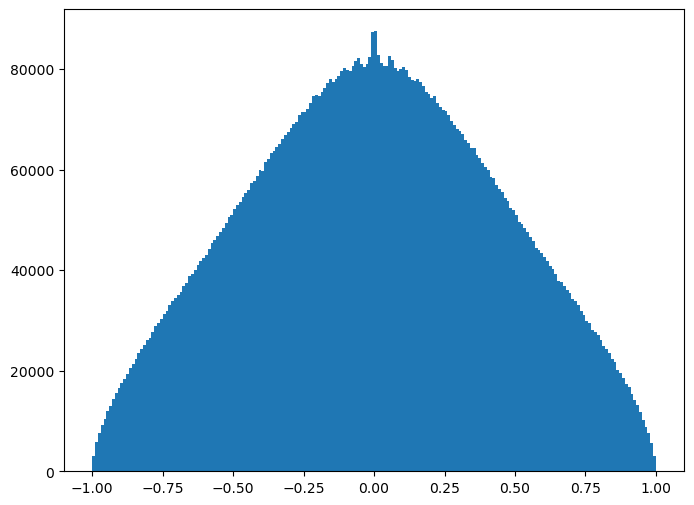

In [207]:
fig, ax = plt.subplots(figsize=(8,6))

ax.hist(vel_pos[:,1], bins=200)

plt.show()

In [211]:
left = np.sum(vel_pos[:,1] > 0)
print(left/vel_pos.shape[0])

0.4999413488211113


In [204]:
vel_pos[1:].shape

(9999798, 6)

In [223]:
np.save('vel_pos_ID445', vel_pos[1:])

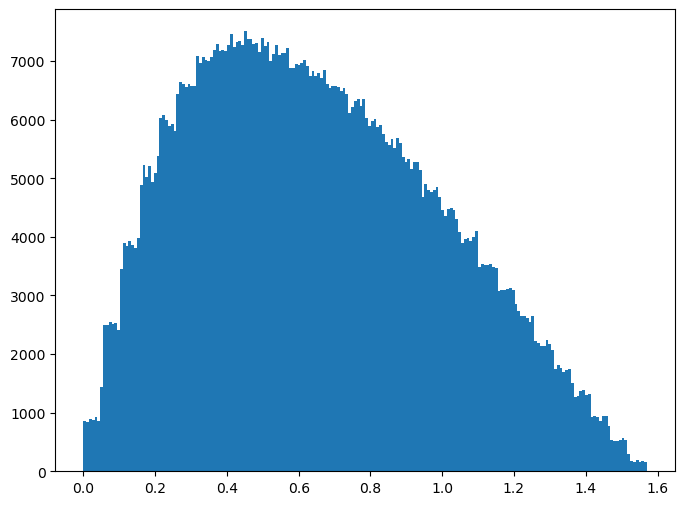

In [71]:
fig, ax = plt.subplots(figsize=(8,6))

ax.hist(sample_n1, bins=200)

plt.show()

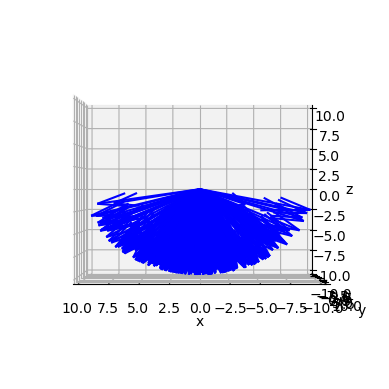

In [135]:
ax = plt.figure().add_subplot(projection='3d')

show = 300
# ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2],length=vNorm[0], color='red')
ax.quiver(np.zeros(show),np.zeros(show), np.zeros(show), \
          vel_matrix[:show, 0], vel_matrix[:show, 1], vel_matrix[:show, 2],length=10, color='blue')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=90, roll=0)
plt.show()

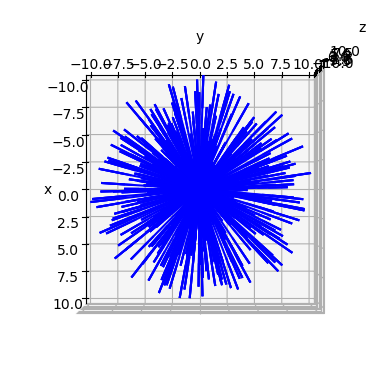

In [136]:
ax = plt.figure().add_subplot(projection='3d')

show = 500
# ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2],length=vNorm[0], color='red')
ax.quiver(np.zeros(show),np.zeros(show), np.zeros(show), \
          vel_matrix[:show, 0], vel_matrix[:show, 1], vel_matrix[:show, 2],length=10, color='blue')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=90, azim=0, roll=0)
plt.show()

In [140]:
y = -20*np.pi/180

ry = R.from_matrix([[np.cos(y),  0,  np.sin(y)],
                    [0,          1,          0],
                    [-np.sin(y), 0,  np.cos(y)]])

vel_matrix_rotate = ry.apply(vel_matrix)



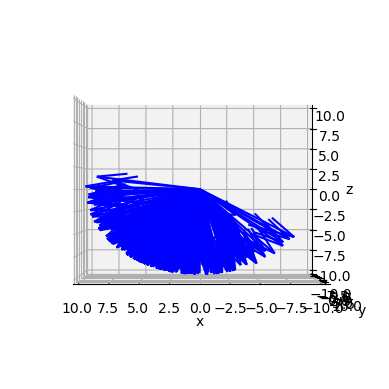

In [141]:
ax = plt.figure().add_subplot(projection='3d')

show = 300
# ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2],length=vNorm[0], color='red')
ax.quiver(np.zeros(show),np.zeros(show), np.zeros(show), \
          vel_matrix_rotate[:show, 0], vel_matrix_rotate[:show, 1], vel_matrix_rotate[:show, 2],length=10, color='blue')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=90, roll=0)
plt.show()

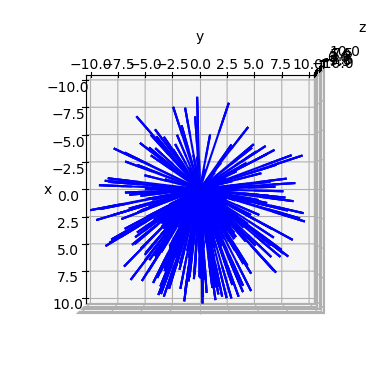

In [142]:
ax = plt.figure().add_subplot(projection='3d')

show = 300
# ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2],length=vNorm[0], color='red')
ax.quiver(np.zeros(show),np.zeros(show), np.zeros(show), \
          vel_matrix_rotate[:show, 0], vel_matrix_rotate[:show, 1], vel_matrix_rotate[:show, 2],length=10, color='blue')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=90, azim=0, roll=0)
plt.show()